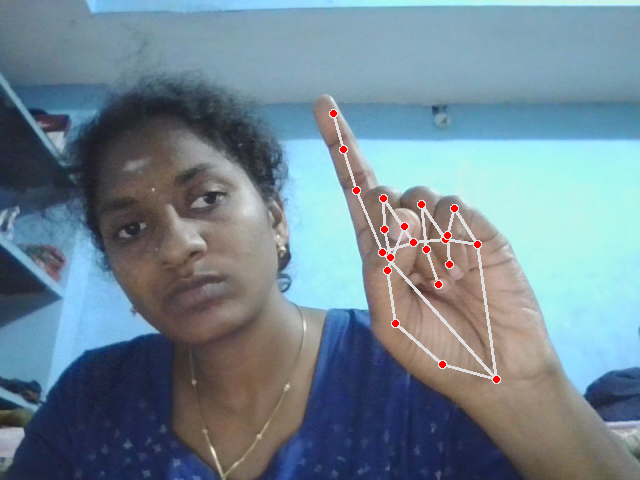

Saved: gestures_1\Z\Z_99.png
Completed capturing 100 frames for gesture: Z.


Press Enter to continue to the next label, or type 'q' to quit:  


In [8]:
import cv2
import os
from PIL import Image
from IPython.display import display, clear_output
import mediapipe as mp

# Initialize Mediapipe Holistic
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Set up the webcam
cap = cv2.VideoCapture(0)

# Check if the webcam is accessible
if not cap.isOpened():
    print("Error: Could not open webcam")
else:
    # Define gesture labels
    gesture_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
                      'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 
                      'U', 'V', 'W', 'X', 'Y', 'Z']
    dataset_path = "gestures_1"

    # Create directories for storing data
    if not os.path.exists(dataset_path):
        os.mkdir(dataset_path)

    for label in gesture_labels:
        gesture_folder = os.path.join(dataset_path, label)
        if not os.path.exists(gesture_folder):
            os.mkdir(gesture_folder)

    print("Press 'q' to quit anytime. Follow prompts to capture frames for gestures.")

    # Mediapipe Holistic model
    with mp_holistic.Holistic(static_image_mode=False, min_detection_confidence=0.5) as holistic:
        try:
            for label in gesture_labels:
                print(f"Starting capture for gesture: {label}")
                input(f"Press Enter to start capturing frames for '{label}', or type 'q' to quit: ")

                frame_count = 0

                while frame_count < 100:
                    ret, frame = cap.read()
                    if not ret:
                        print("Error: Failed to capture frame.")
                        break

                    # Process the frame with Mediapipe
                    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    results = holistic.process(frame_rgb)

                    # Draw landmarks on the frame
                    mp_drawing.draw_landmarks(frame, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
                    mp_drawing.draw_landmarks(frame, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

                    # Convert frame to PIL Image for saving
                    img = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

                    # Display the frame in Jupyter Notebook
                    clear_output(wait=True)
                    display(img)

                    # Save the frame to the appropriate label folder
                    image_path = os.path.join(dataset_path, label, f"{label}_{frame_count}.png")
                    img.save(image_path)
                    print(f"Saved: {image_path}")

                    frame_count += 1

                print(f"Completed capturing 100 frames for gesture: {label}.")

                # Breakpoint after each label
                proceed = input("Press Enter to continue to the next label, or type 'q' to quit: ")
                if proceed.lower() == 'q':
                    print("Exiting the program.")
                    break

        finally:
            # Release the webcam
            cap.release()
